In [1]:
%reset -f
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

plt.style.use('seaborn')
%matplotlib inline

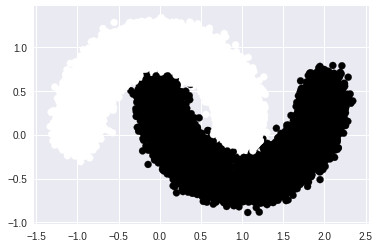

In [2]:
X,y = datasets.make_moons(n_samples=100000, 
                          shuffle=True, 
                          noise=0.1, 
                          random_state=1234)
Y = np.reshape(y, (len(y),1))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [3]:
print(X[0])
print(y[0])

[0.77831057 0.64695615]
0


In [4]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(2, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, x):
        out = self.sigmoid(self.l1(x))
        return out   


In [5]:
model = NeuralNetwork()

In [6]:
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)

In [7]:
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [8]:
#store all the loss values
losses = []

In [9]:
%%time
for epoch in tqdm(range(10000)):
    y_pred = model(inputs)
    loss = criterion(y_pred, labels)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|          | 0/10000 [00:00<?, ?it/s]/home/joshhu/anaconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([100000])) that is different to the input size (torch.Size([100000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
100%|██████████| 10000/10000 [00:20<00:00, 492.13it/s]

CPU times: user 4min 37s, sys: 3.27 s, total: 4min 40s
Wall time: 20.3 s


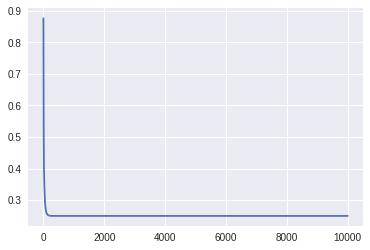

In [10]:
plt.plot(losses)

tensor([[0.9072]], grad_fn=<SigmoidBackward>)


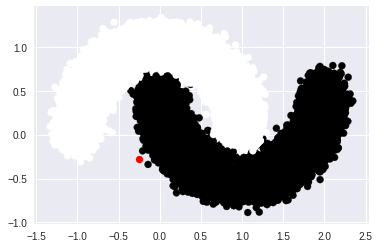

In [11]:
test = torch.randn(1,2, dtype=torch.float)
print(model.forward(test))
test2 = test.cpu().numpy()
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(test2[0][0], test2[0][1],c='red')
plt.show()